In [2]:
%matplotlib widget
import spectral as spy
import spectral.io.envi as envi

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import japanize_matplotlib

from PIL import Image
import csv
import mplcursors

from scipy.signal import argrelmax

In [3]:
HDR_PATH_iphone = '../data/iphone_image_200_2023-07-31_005/results/REFLECTANCE_2023-07-31_005.hdr'
HDR_PATH_pixel = '../data/pixel_image_200_2023-07-31_007/results/REFLECTANCE_2023-07-31_007.hdr'
HDR_PATH_huawei = '../data/huawei_image_200_2023-07-31_009/results/REFLECTANCE_2023-07-31_009.hdr'

IMG_PATH_iphone = '../data/iphone_image_200_2023-07-31_005/results/REFLECTANCE_2023-07-31_005.png'
IMG_PATH_pixel = '../data/pixel_image_200_2023-07-31_007/results/REFLECTANCE_2023-07-31_007.png'
IMG_PATH_huawei = '../data/huawei_image_200_2023-07-31_009/results/REFLECTANCE_2023-07-31_009.png'

In [4]:
spec_img_i = envi.open(HDR_PATH_iphone)
spec_img_p = envi.open(HDR_PATH_pixel)
spec_img_h = envi.open(HDR_PATH_huawei)

FileNotFoundError: Unable to locate file "../data/iphone_image_200_2023-07-31_005/results/REFLECTANCE_2023-07-31_005.hdr". If the file exists, use its full path or place its directory in the SPECTRAL_DATA environment variable.

In [4]:
wave_lengthes = []
hdr = envi.read_envi_header(HDR_PATH_iphone)

for wl in hdr['wavelength']:
    wave_lengthes.append(float(wl))

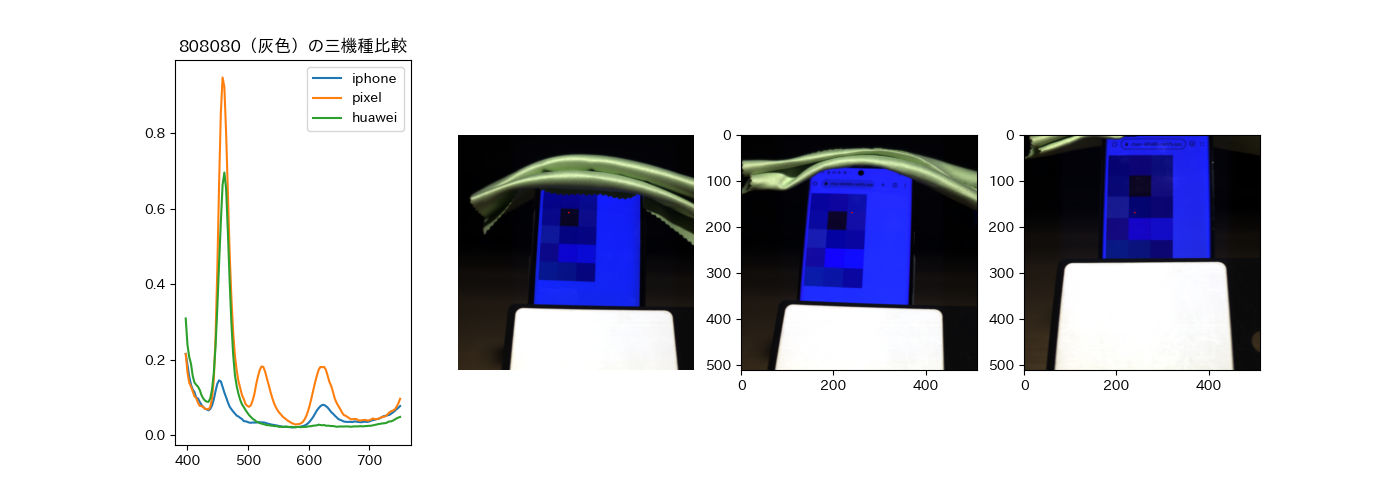

In [5]:
pixel_x = 240 # X座標
pixel_y = 170  # Y座標
color = (255, 0, 0)  # 色(RGB値)

dots=[-1,0,1]
image_i = Image.open(IMG_PATH_iphone)
for i in dots:
    for j in dots:
        image_i.putpixel((pixel_x+i, pixel_y+j), color)
        
image_p = Image.open(IMG_PATH_pixel)
for i in dots:
    for j in dots:
        image_p.putpixel((pixel_x+i, pixel_y+j), color)
image_h = Image.open(IMG_PATH_huawei)
for i in dots:
    for j in dots:
        image_h.putpixel((pixel_x+i, pixel_y+j), color)

x = wave_lengthes[:121]
y_i = spec_img_i.read_pixel(512-pixel_x,pixel_y)[:121]
y_p = spec_img_p.read_pixel(512-pixel_x,pixel_y)[:121]
y_h = spec_img_h.read_pixel(512-pixel_x,pixel_y)[:121]

fig = plt.figure(figsize = (14,5))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)


ax1.plot(x,y_i,label='iphone')
ax1.plot(x,y_p,label='pixel')
ax1.plot(x,y_h,label='huawei')
ax1.set_title('808080（灰色）の三機種比較')
ax1.legend()
ax2.imshow(image_i)
ax2.axis('off')
ax3.imshow(image_p)
ax4.imshow(image_h)
mplcursors.cursor(hover=True)

plt.show()

In [1]:
color = (255,0,0)
image_i = Image.open(IMG_PATH_iphone)
std = 0.06
base = 0.55
LOWER = base - std 
UPPER = base + std

for i in range(512):
    for j in range(512):
        blue_i = spec_img_i.read_pixel(511-i,j)[20]
        if LOWER < blue_i and blue_i < UPPER:
            image_i.putpixel((i, j), color)
            
image_p = Image.open(IMG_PATH_pixel)
for i in range(512):
    for j in range(512):
        blue_p = spec_img_p.read_pixel(511-i,j)[20]
        if LOWER < blue_p and blue_p < UPPER:
            image_p.putpixel((i, j), color)
            

image_h = Image.open(IMG_PATH_huawei)
for i in range(512):
    for j in range(512):
        blue_h = spec_img_h.read_pixel(511-i,j)[20]
        if LOWER < blue_h and blue_h < UPPER:
            image_h.putpixel((i, j), color)
            
fig2 = plt.figure(figsize = (14,5))
_ax1 = fig2.add_subplot(1,3,1)
_ax2 = fig2.add_subplot(1,3,2)
_ax3 = fig2.add_subplot(1,3,3)

_ax1.imshow(image_i)
_ax2.imshow(image_p)
_ax3.imshow(image_h)
plt.show()

NameError: name 'Image' is not defined

In [7]:
ex_max_i=argrelmax(y_i,order=3)
ex_max_p = argrelmax(y_p,order=3)
ex_max_h = argrelmax(y_h,order=3)
print(ex_max_i,ex_max_p,ex_max_h)

(array([19, 41, 77, 95]),) (array([ 21,  43,  76, 105]),) (array([22, 57, 64, 75, 91]),)


In [8]:
ex_max_i[0][0]

19

In [9]:
for elem in ex_max_i[0]:
    print(y_i[elem])

0.14514408
0.034411278
0.08013205
0.036626343


In [10]:
for i in ex_max_p[0]:
    print(y_p[i])

0.9479659
0.18210238
0.18100625
0.044323485


In [11]:
for i in ex_max_h[0]:
    print(y_h[i])

0.69613945
0.022757111
0.022009967
0.027731787
0.023255814


In [12]:
0.617

0.617